**Built on Google colab. Best viewed in the dark theme**

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import glob
from pandas import DataFrame as df
import numpy as np
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
import datetime
from tqdm import tqdm
import pandas as pd
pd.set_option('display.max_colwidth', -1)

In [0]:
start=datetime.datetime.now()

In [4]:
items=glob.glob('/gdrive/My Drive/Capstone project images/processed/Grape*/*.JPG',recursive=True)
data=df(columns=['Item'],data=items)
data['Folder']=data['Item'].str.rsplit('/', 1, expand=True)[0]
data['Folder']=data['Folder'].str.rsplit('/', 1, expand=True)[1]
data['Species']=data['Folder'].str.rsplit('___', 1, expand=True)[0]
data['Disease']=data['Folder'].str.rsplit('___', 1, expand=True)[1]
data['Image Path']=data['Item']
data.drop(['Species','Item','Folder'],axis=1,inplace=True)
data.head()

,Disease,Image Path
0,Black_rot,/gdrive/My Drive/Capstone project images/processed/Grape___Black_rot/4f2e0b9d-ad36-4b62-a475-66f13ce3320b___FAM_B.Rot 0492.JPG
1,Black_rot,/gdrive/My Drive/Capstone project images/processed/Grape___Black_rot/5982e6f4-421b-41ff-a557-a5f91848695b___FAM_B.Rot 3301.JPG
2,Black_rot,/gdrive/My Drive/Capstone project images/processed/Grape___Black_rot/4fa94bfb-d2d9-448e-b3f5-498ed75e467b___FAM_B.Rot 0507.JPG
3,Black_rot,/gdrive/My Drive/Capstone project images/processed/Grape___Black_rot/4a73015b-dbd0-417f-98b3-2016561c9bae___FAM_B.Rot 3577.JPG
4,Black_rot,/gdrive/My Drive/Capstone project images/processed/Grape___Black_rot/597e8cf7-f504-4eb8-ba2d-b6713bcdf9b8___FAM_B.Rot 3423.JPG


In [5]:
data.groupby(['Disease']).nunique()

,Disease,Image Path
Disease,,
Black_rot,1,1180
Esca_(Black_Measles),1,1383
Leaf_blight_(Isariopsis_Leaf_Spot),1,1076
healthy,1,423


In [0]:
X=data.drop(['Disease'],axis=1)
y=data['Disease']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [0]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [9]:
img_train=[]
for image in tqdm(X_train['Image Path']):
    img_train.append(cv2.imread(image,1))

100%|██████████| 2436/2436 [06:15<00:00,  6.50it/s]


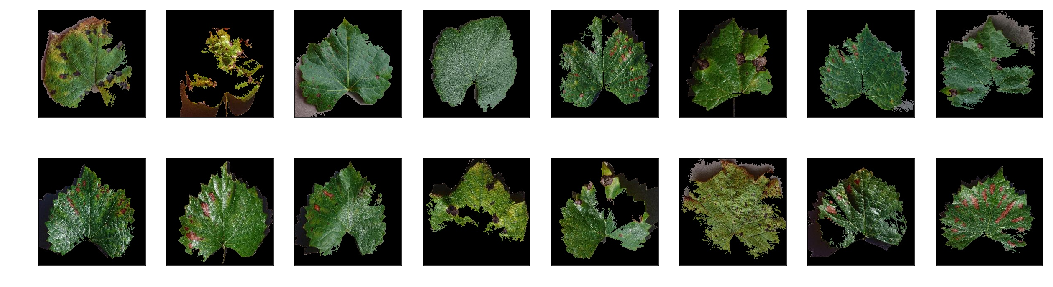

In [10]:
plt.figure(figsize=(18,5))
i=0
for img in img_train[0:16]:
  plt.subplot(2,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.xlabel(y_train.iloc[i],color='w')
  i+=1
plt.show()

In [11]:
img_val=[]
for image in tqdm(X_val['Image Path']):
    img_val.append(cv2.imread(image,1))

100%|██████████| 813/813 [00:56<00:00, 14.36it/s]


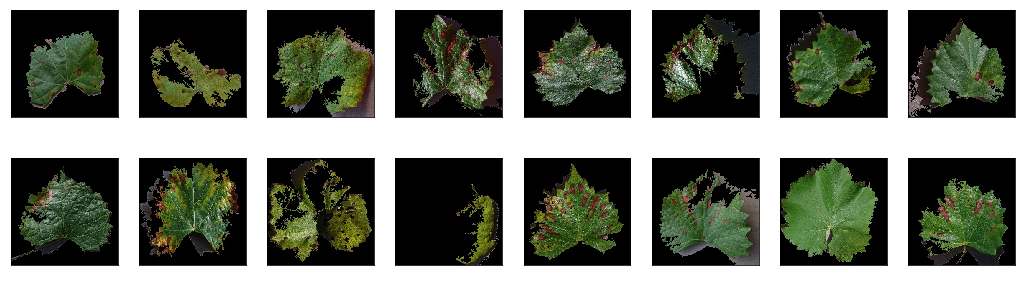

In [12]:
plt.figure(figsize=(18,5))
i=0
for img in img_val[0:16]:
  plt.subplot(2,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.xlabel(y_val.iloc[i],color='w')
  i+=1
plt.show()

In [13]:
img_test=[]
for image in tqdm(X_test['Image Path']):
    img_test.append(cv2.imread(image,1))

100%|██████████| 813/813 [00:24<00:00, 33.01it/s]


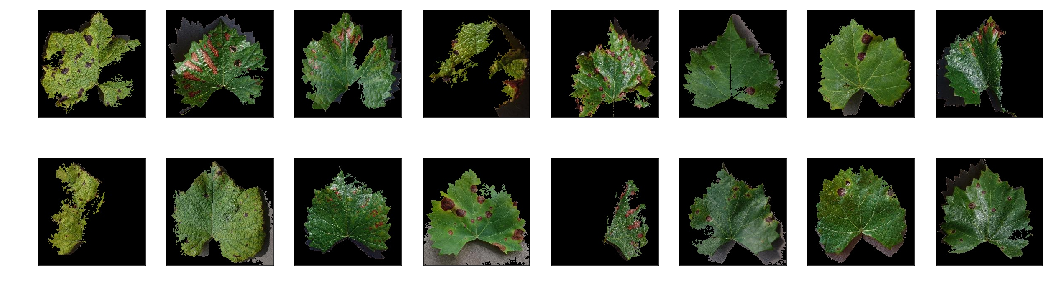

In [14]:
plt.figure(figsize=(18,5))
i=0
for img in img_test[0:16]:
  plt.subplot(2,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.xlabel(y_test.iloc[i],color='w')
  i+=1
plt.show()

In [0]:
img_train=np.array(img_train)
img_val=np.array(img_val)
img_test=np.array(img_test)

In [16]:
train=img_train
train.shape

(2436, 256, 256, 3)

In [17]:
train.resize(train.shape[0],train.shape[1]*train.shape[2]*train.shape[3])
train.shape

(2436, 196608)

In [18]:
val=img_val
val.shape

(813, 256, 256, 3)

In [19]:
val.resize(val.shape[0],val.shape[1]*val.shape[2]*val.shape[3])
val.shape

(813, 196608)

In [20]:
test=img_test
test.shape

(813, 256, 256, 3)

In [21]:
test.resize(test.shape[0],test.shape[1]*test.shape[2]*test.shape[3])
test.shape

(813, 196608)

In [0]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [0]:
lr=LogisticRegression(class_weight='balanced')

In [24]:
lr.fit(train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [0]:
preds=lr.predict(val)

In [26]:
unique_elements, counts_elements = np.unique(preds, return_counts=True)
df(data=counts_elements,index=unique_elements,columns=['Count'])

,Count
Black_rot,249
Esca_(Black_Measles),253
Leaf_blight_(Isariopsis_Leaf_Spot),214
healthy,97


In [0]:
import pickle
#pickle.dump(lr, open('/gdrive/My Drive/Capstone project images/Logistic_Regression_Baseline_Segmented_Colab.sav', 'wb'))

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

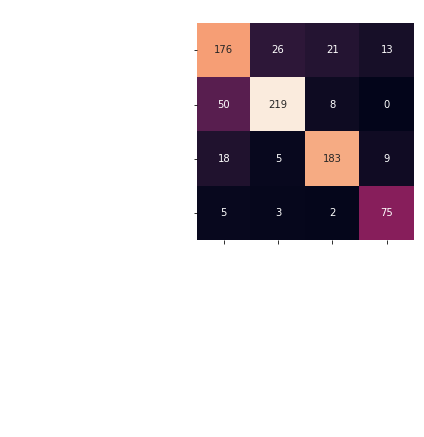

In [29]:
import seaborn as sns
label=['Black_rot','Esca_(Black_Measles)','Leaf_blight_(Isariopsis_Leaf_Spot)','healthy']
sns.heatmap(confusion_matrix(y_val,preds),annot=True,square=True,fmt='g',xticklabels=label,yticklabels=label,cbar=False)
for ticklabel in plt.gca().get_xticklabels():
    ticklabel.set_color('w')
for ticklabel in plt.gca().get_yticklabels():
    ticklabel.set_color('w')
plt.title('Confusion matrix',color='w')
plt.xlabel('Predicted',color='w')
plt.ylabel('True',color='w')
plt.show()

In [30]:
print(classification_report(y_val,preds))

                                    precision    recall  f1-score   support

                         Black_rot       0.71      0.75      0.73       236
              Esca_(Black_Measles)       0.87      0.79      0.83       277
Leaf_blight_(Isariopsis_Leaf_Spot)       0.86      0.85      0.85       215
                           healthy       0.77      0.88      0.82        85

                         micro avg       0.80      0.80      0.80       813
                         macro avg       0.80      0.82      0.81       813
                      weighted avg       0.81      0.80      0.80       813



In [31]:
print(datetime.datetime.now()-start)

0:21:19.252082
